<a href="https://colab.research.google.com/github/dongjae-shin/Bayesian_opt_tutorial/blob/main/230302_Latin_hypercube_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. From-scratch implementation   
cf. https://www.youtube.com/watch?v=r6rp-Qxc9xI

## Loading modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Defining function

In [ ]:
def latin_hypercube_2d_uniform(n):
  lower_limits = np.arange(0, n)/n
  upper_limits = np.arange(1, n+1)/n

  points = np.random.uniform(low=lower_limits, high=upper_limits, size=[2, n]).T
  np.random.shuffle(points[:, 1])

  return points

### python practices

In [ ]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(1, 11)/10

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
np.random.uniform(low=np.arange(0, 10)/10, high=np.arange(1, 11)/10, size=[2, 10]).T

array([[0.00499218, 0.08879384],
       [0.1894052 , 0.10760463],
       [0.23540404, 0.23951961],
       [0.33930151, 0.35978013],
       [0.4749065 , 0.47267904],
       [0.53239873, 0.50440209],
       [0.62222496, 0.60621323],
       [0.74225071, 0.70706167],
       [0.80639573, 0.8435151 ],
       [0.94346341, 0.94459666]])

## Visualization

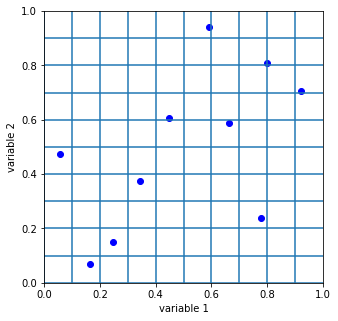

In [ ]:
n=10
p=latin_hypercube_2d_uniform(n)

plt.figure(figsize=(5,5))
plt.xlim(0,1); plt.xlabel("variable 1")
plt.ylim(0,1); plt.ylabel("variable 2")
plt.scatter(p[:,0], p[:,1], c='b')

for i in np.arange(0, 1, 1/n):
  plt.axvline(i)
  plt.axhline(i)

plt.show()

# 2. Reproducing using scipy   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.qmc.LatinHypercube.html

In [ ]:
import scipy
from scipy.stats import qmc

In [ ]:
scipy.__version__

'1.7.3'

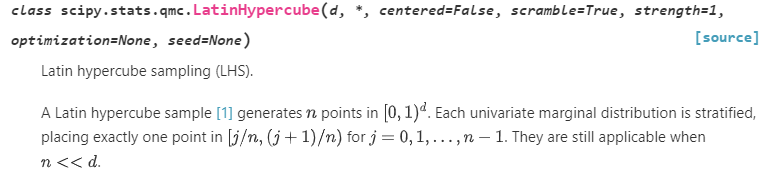

In [ ]:
sampler = qmc.LatinHypercube(d = 2, centered = False)

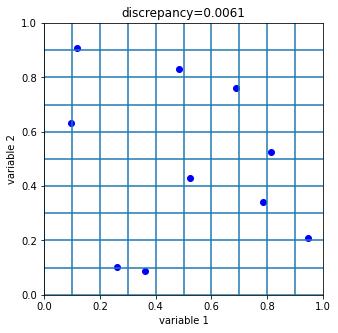

In [ ]:
n = 10
p_scipy = sampler.random(n = n)

plt.figure(figsize=(5,5))
plt.xlim(0,1); plt.xlabel("variable 1")
plt.ylim(0,1); plt.ylabel("variable 2")
plt.scatter(p_scipy[:,0], p_scipy[:,1], c='b')
plt.title("discrepancy={:5.4f}".format(qmc.discrepancy(p_scipy)))

for i in np.arange(0, 1, 1/n):
  plt.axvline(i)
  plt.axhline(i)

plt.show()

In [ ]:
#sampler = qmc.Sobol(d = 2)

## Comparison with just random sampling

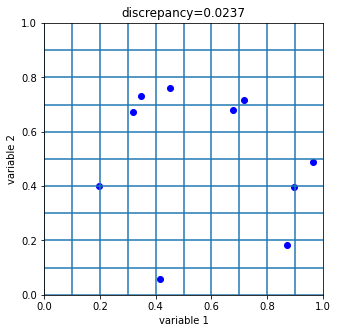

In [ ]:
n = 10
p_scipy = np.random.uniform(low = 0, high = 1, size = [2, n]).T
# p_scipy = sampler.random(n = n)

plt.figure(figsize=(5,5))
plt.xlim(0,1); plt.xlabel("variable 1")
plt.ylim(0,1); plt.ylabel("variable 2")
plt.scatter(p_scipy[:,0], p_scipy[:,1], c='b')
plt.title("discrepancy={:5.4f}".format(qmc.discrepancy(p_scipy)))

for i in np.arange(0, 1, 1/n):
  plt.axvline(i)
  plt.axhline(i)

plt.show()

### What is the discrepancy?   

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.qmc.discrepancy.html#scipy.stats.qmc.discrepancy   
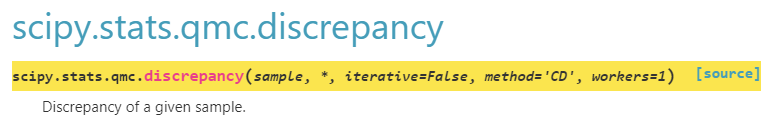

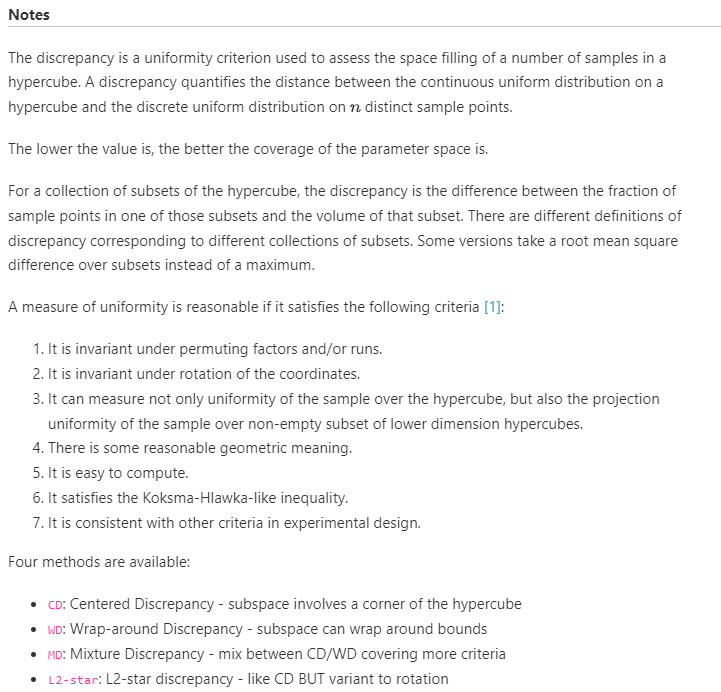

* Centered $L_2$-discrepancy (CD) is default. The CD is calculated as follows:   
https://www.ams.org/journals/mcom/1998-67-221/S0025-5718-98-00894-1/


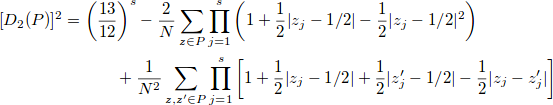

I don't know the exact meaning of the equation yet...

## Converting back to real scale

In [ ]:
l_bounds = [0, 30]
u_bounds = [100, 720]

p_scipy_descaled = qmc.scale(p_scipy, l_bounds = l_bounds, u_bounds = u_bounds)

print("scaled: \n", p_scipy, "\n")
print("descaled: \n", p_scipy_descaled)

scaled: 
 [[0.89537024 0.39844139]
 [0.87190993 0.18211235]
 [0.45114004 0.76125125]
 [0.31704981 0.67092902]
 [0.19544837 0.40130402]
 [0.41376859 0.05632231]
 [0.67583027 0.68116934]
 [0.71766282 0.71671376]
 [0.34717802 0.73261379]
 [0.96464994 0.48800781]] 

descaled: 
 [[ 89.53702435 304.92455765]
 [ 87.19099293 155.65752134]
 [ 45.11400437 555.26336168]
 [ 31.70498059 492.94102523]
 [ 19.54483738 306.89977173]
 [ 41.37685876  68.86239318]
 [ 67.58302716 500.00684787]
 [ 71.76628152 524.53249233]
 [ 34.71780209 535.50351472]
 [ 96.46499351 366.72538569]]


# 3. Application to real problem: generation of initial samples for the exsolution catalyst optimization

* code snippet from the GPyOpt code for the ceria exsolution problem:
```
# Scaling X
data_set[features[0]] = scale(data_set[features[0]], 720, 60)
data_set[features[1]] = scale(data_set[features[1]], 900, 30)
data_set[features[2]] = scale(data_set[features[2]],  15,  5)
data_set[features[3]] = scale(data_set[features[3]], 100,  1)
```

In [ ]:
from scipy.stats import qmc
import pandas as pd

In [ ]:
d = 4 # data dimension
n = 10 # number of samples

sampler = qmc.LatinHypercube(d = d, centered = False)
p = sampler.random(n = n)

Sampling 10 four-dimensional data points based on the LHS method

In [ ]:
l_bounds = [60, 30, 5, 1]
u_bounds = [720, 900, 15, 100]

p_descaled = qmc.scale(p, l_bounds = l_bounds, u_bounds = u_bounds)

print("scaled: \n", p, "\n")
print("descaled: \n", p_descaled)

scaled: 
 [[0.65495912 0.4775564  0.22991304 0.78846139]
 [0.0692441  0.26988097 0.43228863 0.38473063]
 [0.16206574 0.71823152 0.95546762 0.4318277 ]
 [0.85136955 0.82122065 0.12522742 0.08709464]
 [0.23558133 0.54103279 0.07670662 0.14574003]
 [0.52153394 0.63609792 0.66199116 0.22101617]
 [0.35475553 0.33450635 0.56462136 0.93874409]
 [0.49645388 0.14287347 0.78195561 0.51977285]
 [0.92445621 0.08687657 0.86493662 0.60248118]
 [0.71661058 0.96669679 0.3885512  0.83599114]] 

descaled: 
 [[492.27301736 445.47406956   7.29913042  79.05767789]
 [105.70110317 264.79643983   9.32288625  39.08833265]
 [166.96338515 654.86142633  14.55467617  43.75094263]
 [621.90390412 744.46196341   6.25227423   9.62236896]
 [215.48367548 500.69852592   5.76706616  15.42826277]
 [404.21240043 583.40518813  11.61991159  22.88060049]
 [294.13864714 321.02052077  10.64621356  93.93566474]
 [387.65956078 154.29992218  12.81955609  52.45751252]
 [670.1410993  105.58261805  13.64936622  60.64563728]
 [532.9629

In [ ]:
pd.DataFrame(p_descaled, 
             columns=['time (min)','temp. (oC)','ramp (oC/min)','[H2] (vol %)'])

,time (min),temp. (oC),ramp (oC/min),[H2] (vol %)
0,492.273017,445.474070,7.299130,79.057678
1,105.701103,264.796440,9.322886,39.088333
2,166.963385,654.861426,14.554676,43.750943
3,621.903904,744.461963,6.252274,9.622369
4,215.483675,500.698526,5.767066,15.428263
5,404.212400,583.405188,11.619912,22.880600
6,294.138647,321.020521,10.646214,93.935665
7,387.659561,154.299922,12.819556,52.457513
8,670.141099,105.582618,13.649366,60.645637
9,532.962981,871.026208,8.885512,83.763123


### comparing discrepancies between LHS and randomg smapling

In [ ]:
qmc.discrepancy(p)

0.00785708278479702

In [ ]:
n = 10
p_scipy = np.random.uniform(low = 0, high = 1, size = [4, n]).T

qmc.discrepancy(p_scipy)

0.11109194660077448